***Importing Libraries***

Using Several Links and Sources:

1) https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9
2) Andrew NG - Deep learning MIT CA

In [ ]:
from math import sin,pi
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import random

***MLP Class***

In [ ]:
random.seed(10)
class Multi_Layer_Perceptron: #Multi Layer with one hidden layer
    def __init__(self, learningrate, numofneurons):
        
        self.learningrate = learningrate
        self.numofneurons = numofneurons
        self.output = np.zeros(1) 
          #Hidden layer
        self.w1 = np.random.rand(2, self.numofneurons)
        self.b1 = np.zeros((self.numofneurons, 1))
          #Out Layer
        self.w2 = np.random.rand(self.numofneurons,1)
        self.b2 = np.zeros((1, 1))

    def ReLU(self, x, diff):
      if diff == 0:
        return np.maximum(0, x)
      else:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    def train(self, x, y, x_valid, y_valid, epochs):
        
        train_cal_cost = {}
        validation_cal_cost = {}

        for i in range(epochs):
            epoch_train_loss = 0
            epoch_validation_loss = 0
            for j in range(len(x)):
                self.input = x[j]
                self.Forward()
                self.Backward(y[j])
                epoch_train_loss += self.cost(self.output, y[j])

            for j in range(len(x_valid)):
                self.input = x_valid[j]
                self.Forward()
                epoch_validation_loss += self.cost(self.output, y_valid[j])
      
            train_cal_cost[i] = float(epoch_train_loss / len(x))
            validation_cal_cost[i] = float(epoch_validation_loss / len(x_valid))
            print('Epoch %d : Train loss = %f - Validation loss = %f' % (i, train_cal_cost[i], validation_cal_cost[i]))


        return train_cal_cost, validation_cal_cost

    def Forward(self):
        self.slayer = np.dot(self.w1.T, self.input) + self.b1
        self.zlayer = self.ReLU(self.slayer,diff = 0)
        self.output = np.dot(self.w2.T, self.zlayer) + self.b2
  
    def Backward(self, y):
        #Out Layer
        d_ye = 2 * (self.output - y)
        d_b2 = d_ye
        d_w2 = np.dot(self.zlayer, d_ye)
        #Hidden layer
        w2_s = np.dot(self.w2, self.ReLU(self.slayer,diff = 1).T)
        weight_changes = [[1] for _ in range(self.numofneurons)]
        w2_s_weight=np.dot(w2_s, np.array(weight_changes))
        d_b1 = np.dot(w2_s_weight, d_ye)

        
        dye_w2=np.multiply(d_ye * self.ReLU(self.slayer, diff = 1),self.w2)
        x_r = np.repeat(self.input, self.numofneurons, axis=1)
        d_w1 = x_r.dot(dye_w2) * d_ye
        #Hidden Layer
        self.w1 -= self.learningrate * d_w1
        self.b1 -= self.learningrate * d_b1
        #Out layer
        self.w2 -= self.learningrate * d_w2
        self.b2 -= self.learningrate * d_b2

    def cost(self, y, ye): 
        return np.power(y - ye, 2)

    def expected (self, x):
        ye = []
        for i in range(x.shape[0]):
            self.input = x[i]
            self.Forward()
            ye.append(self.output)
        return ye

***DATA GENERATING & PREPROCESSING & LOSS FUNCTIONS***

In [ ]:
def sin(x1, x2):
    return np.sin(x1+x2)
 
random.seed(10)
def sin_data_generating(x_train):
  sampling = 1000
  x = np.linspace(0, 2*(np.pi), sampling).reshape((sampling, 1))
  x_n = np.append(x, np.zeros((len(x), 1)), axis = 1).reshape(sampling, 2, 1)
  range = np.max(x_train) - np.min(x_train)
  x_norm = (x_n -  np.min(x_train)) / range
  return x, x_norm
  
def generating(on,num_data):
  y_vals, x1_vals ,x2_vals= [],[],[]

  for i in range(0, num_data):
      x1 = (random.uniform(0, 2*pi))
      if (on==1):
        x2 = (random.uniform(0, 2*pi))
      else:
        x2 = 0
      x1_vals.append(x1)
      x2_vals.append(x2)
      y_vals.append(sin(x1_vals[i],x2_vals[i]))
  x_vals = []
  for i in range(len(x1_vals)):
      x_vals.append((x1_vals[i], x2_vals[i]))
  x_vals = np.reshape(np.array(x_vals), (num_data, 2, 1))
  y_vals = np.reshape(np.array(y_vals), (num_data, 1))
  return  x_vals,y_vals
    
def splitting(x_values, y_values):
    
    numofrow = x_values.shape[0]
    tIndex = int(80 / 100 * numofrow) 
    valIndex = int(90 / 100 * numofrow)
    x_train = x_values[:tIndex, :] 
    y_train = y_values[:tIndex] 
    x_validation = x_values[tIndex:valIndex, :] 
    y_validation = y_values[tIndex:valIndex] 
    x_test = x_values[valIndex:, :] 
    y_test = y_values[valIndex:] 

    return x_train, y_train, x_validation, y_validation, x_test, y_test

def normalizing(train,valid,test,range,min_data):
    n_train = (train - min_data) / range
    n_valid = (valid - min_data) / range
    n_test = (test - min_data) / range
    return n_train, n_valid, n_test

def L2_Loss(y1, y2):
    dy = y1 - y2
    dy_2 = np.sum(np.power(dy, 2))
    y_shape = y1.shape[0]
    return dy_2 / y_shape

***Loss and Cost Visualizer Function***

In [ ]:
def plot_loss(train_cost, valid_loss, numofepoch):

    plt.plot(list(train_cost.keys()), list(train_cost.values()), 'b', label='Train Loss')
    plt.plot(list(valid_loss.keys()), list(valid_loss.values()), 'r', label='Validation Loss')
    plt.legend(loc="upper right")
    plt.title("Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

***DATA RUN***

In [ ]:
x_values, y_values=generating(on=1,num_data = 10000)
x_train, y_train, x_validation, y_validation, x_test, y_test = splitting(x_values, y_values)
x_train, x_validation, x_test  = normalizing(x_train, x_validation, x_test, np.max(x_train) - np.min(x_train) , np.min(x_train))

***FIT MODEL***

In [ ]:
MLP = Multi_Layer_Perceptron(0.0015, 7)
train_cost, validation_cost = MLP.train(x_train, y_train, x_validation, y_validation, epochs = 100)

Epoch 0/100 : Train loss = 0.506319 - Validation loss = 0.514927
Epoch 1/100 : Train loss = 0.505518 - Validation loss = 0.514858
Epoch 2/100 : Train loss = 0.505645 - Validation loss = 0.514815
Epoch 3/100 : Train loss = 0.505504 - Validation loss = 0.514767
Epoch 4/100 : Train loss = 0.506157 - Validation loss = 0.514816
Epoch 5/100 : Train loss = 0.505998 - Validation loss = 0.514351
Epoch 6/100 : Train loss = 0.505712 - Validation loss = 0.514590
Epoch 7/100 : Train loss = 0.505382 - Validation loss = 0.514894
Epoch 8/100 : Train loss = 0.505344 - Validation loss = 0.514753
Epoch 9/100 : Train loss = 0.505371 - Validation loss = 0.514792
Epoch 10/100 : Train loss = 0.504753 - Validation loss = 0.513815
Epoch 11/100 : Train loss = 0.505423 - Validation loss = 0.515112
Epoch 12/100 : Train loss = 0.505388 - Validation loss = 0.513751
Epoch 13/100 : Train loss = 0.504846 - Validation loss = 0.514630
Epoch 14/100 : Train loss = 0.504890 - Validation loss = 0.513938
Epoch 15/100 : Train

***Observing Cost & Loss***

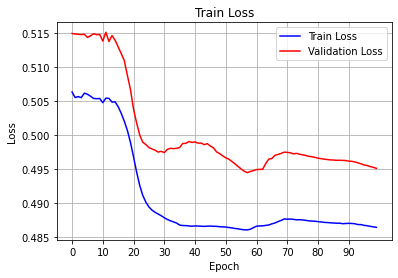

Test Loss= 0.474417


In [ ]:
#Time to plot our result:)
plot_loss(train_cost,  validation_cost, numofepoch=100)
ye = MLP.expected(x_test)
print('Test Loss= %f' % L2_Loss(np.array(ye).reshape((len(ye), 1)), y_test))

***Ploting Sin by MLP***

In [ ]:
#generating Sin(x) data
x_vals, y_vals = generating(on=0,num_data = 10000)
#print(x_vals)
#Now we should split to train and test
x_train, y_train, x_validation, y_validation, x_test, y_test = splitting(x_vals, y_vals)
#Normalizing Time
x_train, x_validation, x_test  = normalizing(x_train, x_validation, x_test, np.max(x_train) - np.min(x_train) , np.min(x_train))

[[[0.66806977]
  [0.        ]]

 [[2.06143631]
  [0.        ]]

 [[6.27018259]
  [0.        ]]

 ...

 [[5.63374888]
  [0.        ]]

 [[1.01876694]
  [0.        ]]

 [[5.81790235]
  [0.        ]]]


Epoch 0/100 : Train loss = 0.359266 - Validation loss = 0.199509
Epoch 1/100 : Train loss = 0.205706 - Validation loss = 0.172102
Epoch 2/100 : Train loss = 0.176749 - Validation loss = 0.180996
Epoch 3/100 : Train loss = 0.193814 - Validation loss = 0.262223
Epoch 4/100 : Train loss = 0.242793 - Validation loss = 0.328992
Epoch 5/100 : Train loss = 0.317970 - Validation loss = 0.364039
Epoch 6/100 : Train loss = 0.400130 - Validation loss = 0.376863
Epoch 7/100 : Train loss = 0.433745 - Validation loss = 0.360843
Epoch 8/100 : Train loss = 0.400423 - Validation loss = 0.313661
Epoch 9/100 : Train loss = 0.338387 - Validation loss = 0.254497
Epoch 10/100 : Train loss = 0.279131 - Validation loss = 0.201660
Epoch 11/100 : Train loss = 0.232262 - Validation loss = 0.164518
Epoch 12/100 : Train loss = 0.196571 - Validation loss = 0.137541
Epoch 13/100 : Train loss = 0.168715 - Validation loss = 0.120544
Epoch 14/100 : Train loss = 0.147767 - Validation loss = 0.106672
Epoch 15/100 : Train

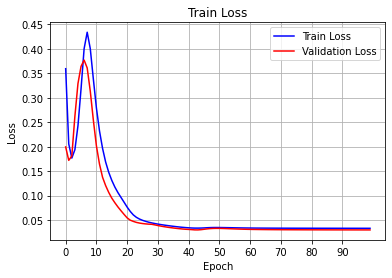

In [ ]:
#Fitting Model
MLP = Multi_Layer_Perceptron(0.0015, 7)
train_costs, validation_costs = MLP.train(x_train, y_train, x_validation, y_validation, epochs = 100)
#Time to plot our result
plot_loss(train_costs, validation_costs, numofepoch=100)

***Evaluating Our predict with the real Sin***

Test Loss= 0.039404


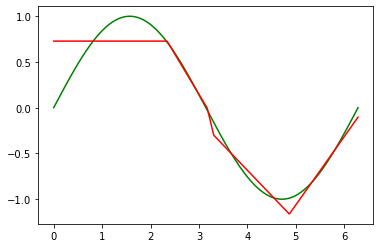

In [ ]:
#Time to observe our Loss
ye = MLP.expected(x_test)
ye = np.array(ye).reshape((len(ye), 1))
print('Test Loss= %f' % L2_Loss(ye, y_test))

#generating test data for Sin and making it in a true shape
x, x_sin = sin_data_generating(x_train)

#prediction
ye = MLP.expected(x_sin)
ye = np.array(ye).reshape((1000, 1))
#Real Sin
ysin = np.sin(x)

#Time to see our prediction
plt.plot(x, ye, 'r')
plt.plot(x, ysin, 'g')
plt.show()